### **DESPLIEGUE INICIAL**

Librerias necesarias para el desarrollo.

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import boto3
import pyarrow as pa
from datetime import datetime, date

In [6]:
data_1_csv_df = pd.read_csv('../data/fraud_data_1.csv')
data_2_json_df = pd.read_json('../data/fraud_data_2.json')

df_list = [data_1_csv_df,data_2_json_df]
datos_df = pd.concat(df_list)
datos_df_copy = datos_df.copy()

print(datos_df_copy.shape)
print("")
datos_df_copy.columns

(1852394, 23)



Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
n = 400000
datos_df_copy.drop(datos_df_copy.tail(n).index,inplace = True)
print(datos_df_copy.shape)

(1052394, 23)


In [8]:
del(datos_df_copy['Unnamed: 0'])
del(datos_df_copy['unix_time'])

In [9]:
datos_df_copy.columns = ['fecha_hora_transaccion', 'numero_tarjeta_credito_transaccion', 'nombre_local_comercial', 
                         'categoria_local_comercial', 'valor_transaccion', 'nombre_titular_cuenta', 'apellido_titular_cuenta', 
                         'genero_titular_cuenta', 'calle_titular_cuenta', 'ciudad_titular_cuenta', 'estado_titular_cuenta', 
                         'codigo_postal_titular_cuenta', 'latitud_titular_cuenta', 'longitud_titular_cuenta', 
                         'poblacion_ciudad_titular_cuenta', 'trabajo_titular_cuenta', 'fecha_nacimiento_titular_cuenta', 
                         'numero_trasaccion', 'latitud_local_comercial', 'longitud_local_comercial', 'fraude']
datos_df_copy['nombre_completo_titular'] = datos_df_copy.nombre_titular_cuenta.str.cat(datos_df_copy.apellido_titular_cuenta, sep=' ')

In [10]:
datos_df_copy['nombre_completo_titular'] = datos_df_copy.nombre_titular_cuenta.str.cat(datos_df_copy.apellido_titular_cuenta, sep=' ')

Analisis rapido de los datos

In [11]:
print("valores nulos ********************************************")
print(datos_df_copy.isnull().sum())
print("Tipo de datos ********************************************")
print(datos_df_copy.dtypes)
print("Largo de datos *******************************************")
print(datos_df_copy.shape)
print("Estadisticas de los datos ********************************")
print(datos_df_copy.describe())


valores nulos ********************************************
fecha_hora_transaccion                0
numero_tarjeta_credito_transaccion    0
nombre_local_comercial                0
categoria_local_comercial             0
valor_transaccion                     0
nombre_titular_cuenta                 0
apellido_titular_cuenta               0
genero_titular_cuenta                 0
calle_titular_cuenta                  0
ciudad_titular_cuenta                 0
estado_titular_cuenta                 0
codigo_postal_titular_cuenta          0
latitud_titular_cuenta                0
longitud_titular_cuenta               0
poblacion_ciudad_titular_cuenta       0
trabajo_titular_cuenta                0
fecha_nacimiento_titular_cuenta       0
numero_trasaccion                     0
latitud_local_comercial               0
longitud_local_comercial              0
fraude                                0
nombre_completo_titular               0
dtype: int64
Tipo de datos **********************************

In [12]:
print("Tipo de datos ********************************************")
print(datos_df_copy.dtypes)

Tipo de datos ********************************************
fecha_hora_transaccion                 object
numero_tarjeta_credito_transaccion      int64
nombre_local_comercial                 object
categoria_local_comercial              object
valor_transaccion                     float64
nombre_titular_cuenta                  object
apellido_titular_cuenta                object
genero_titular_cuenta                  object
calle_titular_cuenta                   object
ciudad_titular_cuenta                  object
estado_titular_cuenta                  object
codigo_postal_titular_cuenta            int64
latitud_titular_cuenta                float64
longitud_titular_cuenta               float64
poblacion_ciudad_titular_cuenta         int64
trabajo_titular_cuenta                 object
fecha_nacimiento_titular_cuenta        object
numero_trasaccion                      object
latitud_local_comercial               float64
longitud_local_comercial              float64
fraude               

In [13]:
print("Largo de datos *******************************************")
print(datos_df_copy.shape)

Largo de datos *******************************************
(1052394, 22)


In [14]:
print("Estadisticas de los datos ********************************************")
print(datos_df_copy.describe())

Estadisticas de los datos ********************************************
       numero_tarjeta_credito_transaccion  valor_transaccion  \
count                        1.052394e+06       1.052394e+06   
mean                         4.175187e+17       7.044610e+01   
std                          1.309196e+18       1.593924e+02   
min                          6.041621e+10       1.000000e+00   
25%                          1.800429e+14       9.650000e+00   
50%                          3.521417e+15       4.756000e+01   
75%                          4.642255e+15       8.321000e+01   
max                          4.992346e+18       2.894890e+04   

       codigo_postal_titular_cuenta  latitud_titular_cuenta  \
count                  1.052394e+06            1.052394e+06   
mean                   4.882339e+04            3.854044e+01   
std                    2.688212e+04            5.076383e+00   
min                    1.257000e+03            2.002710e+01   
25%                    2.623700e+04  

In [15]:
print("")
print(f"Promedio de transacciones por titulares de cuenta {datos_df_copy.shape[0]/datos_df_copy.nombre_completo_titular.nunique():.2f}")
print(f"Promedio de transacciones por local comercial {datos_df_copy.shape[0]/datos_df_copy.nombre_local_comercial.nunique():.2f}")
print("")
print(f"Total de transacciones {datos_df_copy.shape[0]}")
print(f"Total de fraudes en la muestra {(datos_df_copy['fraude'] == 1).sum()}")
print(f"Total de transacciones sin fraude {(datos_df_copy['fraude'] == 0).sum()}")
print("")
print("N de transaciones NaN: " + str(len(datos_df_copy[datos_df_copy['valor_transaccion'] == 'NaN'])))
print("N de transaciones vacias: " + str(len(datos_df_copy[datos_df_copy['valor_transaccion'] == ''])))


Promedio de transacciones por titulares de cuenta 1087.18
Promedio de transacciones por local comercial 1518.61

Total de transacciones 1052394
Total de fraudes en la muestra 6388
Total de transacciones sin fraude 1046006

N de transaciones NaN: 0
N de transaciones vacias: 0


In [16]:
print('Cantidad de fraudes: 1')
print(datos_df_copy.fraude.value_counts())
print('% de fraudes: 1')
print((datos_df_copy.fraude.value_counts()/len(datos_df_copy['fraude']))*100 )

Cantidad de fraudes: 1
0    1046006
1       6388
Name: fraude, dtype: int64
% de fraudes: 1
0    99.393003
1     0.606997
Name: fraude, dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       Fraudes  Transacciones  Tasa_de_fraudes
horas                                         
0          552          34550         0.015977
1          559          34727         0.016097
2          530          34628         0.015306
3          518          34529         0.015002
4           41          33748         0.001215
5           51          34273         0.001488
6           38          34252         0.001109
7           52          34177         0.001521
8           33          34379         0.000960
9           43          34076         0.001262
10          35          34046         0.001028
11          41          34080         0.001203
12          55          52997         0.001038
13          64          53080         0.001206
14          68          52585         0.001293
15          66          53126         0.001242
16          65          53591         0.001213
17          64          53133         0.001205
18          72          53632         0.001342
19          7

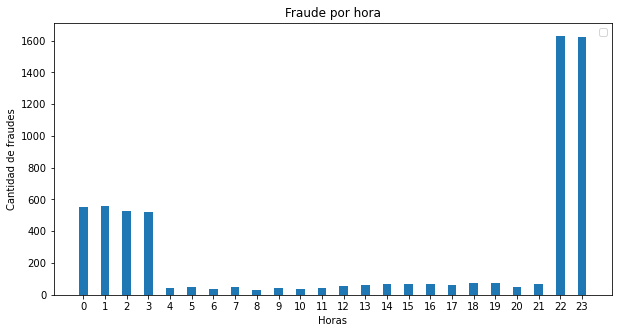

In [17]:
datos_df_copy['fecha_hora_transaccion'] = pd.to_datetime(datos_df_copy.fecha_hora_transaccion)
datos_df_copy['horas'] = datos_df_copy['fecha_hora_transaccion'].dt.hour

# datos_df_copy['horas']
horas_fraude = pd.concat([datos_df_copy.groupby("horas")["fraude"].sum(),datos_df_copy.groupby("horas")["fraude"].count()],axis=1)
horas_fraude.columns = ["Fraudes", "Transacciones"]
horas_fraude["Tasa_de_fraudes"] = horas_fraude.Fraudes/horas_fraude.Transacciones
print(horas_fraude.sort_values(by="horas",ascending=True))

plt.figure(figsize=(10,5))
w=0.4
x = horas_fraude.index
y = horas_fraude.Fraudes
plt.bar(x,y,w)

plt.xlabel("Horas")
plt.ylabel("Cantidad de fraudes")
plt.title("Fraude por hora")
plt.xticks(x,x)
plt.legend()
plt.show()




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       fraude  total_fraudes  tasa_total_fraudes_por_hora
horas                                                    
0         552           6388                     8.641202
1         559           6388                     8.750783
2         530           6388                     8.296807
3         518           6388                     8.108954
4          41           6388                     0.641828
5          51           6388                     0.798372
6          38           6388                     0.594865
7          52           6388                     0.814026
8          33           6388                     0.516594
9          43           6388                     0.673137
10         35           6388                     0.547902
11         41           6388                     0.641828
12         55           6388                     0.860989
13         64           6388                     1.001879
14         68           6388                     1.064496
15         66 

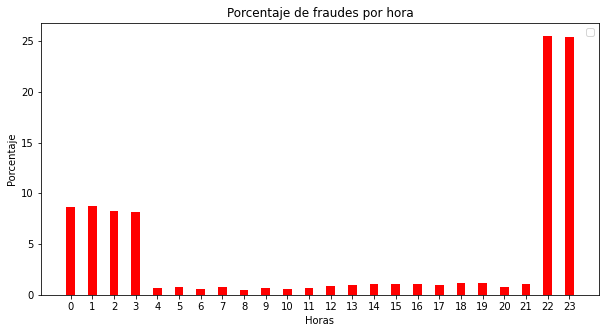

In [18]:
datos_df_copy['fecha_hora_transaccion'] = pd.to_datetime(datos_df_copy.fecha_hora_transaccion)
datos_df_copy['horas'] = datos_df_copy['fecha_hora_transaccion'].dt.hour

horas_fraude = datos_df_copy[["horas", "fraude"]]
horas_fraude = horas_fraude.groupby("horas").sum()
horas_fraude['total_fraudes'] = horas_fraude.fraude.sum()
horas_fraude['tasa_total_fraudes_por_hora'] = (horas_fraude.fraude/horas_fraude.total_fraudes)*100.00

print(horas_fraude.sort_values(by="horas",ascending=True))

plt.figure(figsize=(10,5))
w=0.4
x = horas_fraude.index
y = horas_fraude.tasa_total_fraudes_por_hora
plt.bar(x,y,w, color='red')

plt.xlabel("Horas")
plt.ylabel("Porcentaje")
plt.title("Porcentaje de fraudes por hora")
plt.xticks(x,x)
plt.legend()
plt.show()



       fraude  total_fraudes  tasa_total_fraudes_por_hora
horas                                                    
0         552           6388                     8.641202
1         559           6388                     8.750783
2         530           6388                     8.296807
3         518           6388                     8.108954
4          41           6388                     0.641828
5          51           6388                     0.798372
6          38           6388                     0.594865
7          52           6388                     0.814026
8          33           6388                     0.516594
9          43           6388                     0.673137
10         35           6388                     0.547902
11         41           6388                     0.641828
12         55           6388                     0.860989
13         64           6388                     1.001879
14         68           6388                     1.064496
15         66 

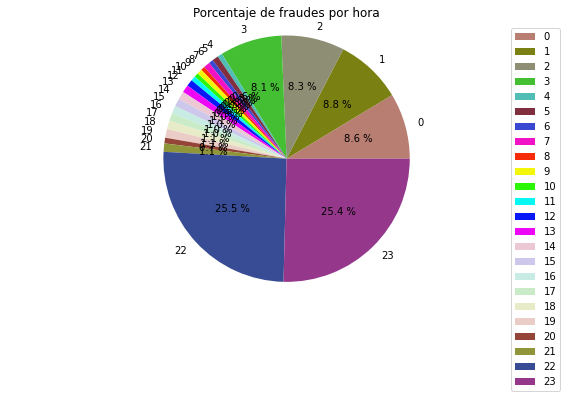

In [19]:
datos_df_copy['fecha_hora_transaccion'] = pd.to_datetime(datos_df_copy.fecha_hora_transaccion)
datos_df_copy['horas'] = datos_df_copy['fecha_hora_transaccion'].dt.hour

horas_fraude = datos_df_copy[["horas", "fraude"]]
horas_fraude = horas_fraude.groupby("horas").sum()
horas_fraude['total_fraudes'] = horas_fraude.fraude.sum()
horas_fraude['tasa_total_fraudes_por_hora'] = (horas_fraude.fraude/horas_fraude.total_fraudes)*100.00

print(horas_fraude.sort_values(by="horas",ascending=True))

h = horas_fraude.index
d = horas_fraude.tasa_total_fraudes_por_hora
colores = ("#B87E72", "#7B8013", "#8D8E74", "#44BE33", "#50BEB4", "#812F3F", "#3A47D1", "#F112C5", 
           "#F72B07", "#F3F707", "#2BF707", "#07F7F3", "#0719F7", "#EC07F7", "#EBC8D4", "#CDC8EB",
           "#C8EBE4", "#CAEBC8", "#E8EBC8", "#EBCDC8", "#954538", "#8F9538", "#384C95", "#95388C")

desfase = (1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1)

plt.figure(figsize=(10,5))
plt.pie(d, labels=h, autopct="%0.1f %%", colors=colores)

plt.title("Porcentaje de fraudes por hora")
plt.axis('equal')
plt.legend()
plt.show()

                 fraude  total_fraudes  tasa_total_fraudes_por_edades
grupo_edades                                                         
menores de 18        27           6388                       0.422668
jovenes 18 - 26     415           6388                       6.496556
adultos 27 - 59    3870           6388                      60.582342
mayores de 60      2076           6388                      32.498435


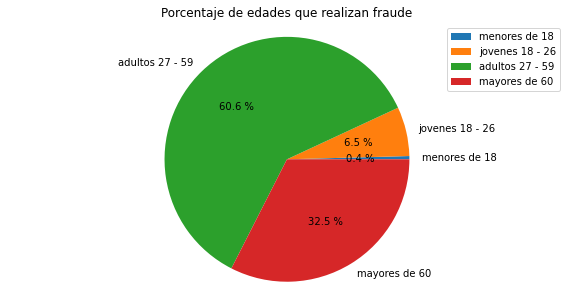

In [20]:
datos_df_copy['fecha_nacimiento_titular_cuenta'] = pd.to_datetime(datos_df_copy.fecha_nacimiento_titular_cuenta)
datos_df_copy['edad_titular'] = (date.today().year) - (datos_df_copy['fecha_nacimiento_titular_cuenta'].dt.year)


bins = [0, 18, 26, 59, 100]
names = ["menores de 18", "jovenes 18 - 26", "adultos 27 - 59", "mayores de 60"]
datos_df_copy['grupo_edades'] = pd.cut(datos_df_copy["edad_titular"], bins, labels = names)

edades_fraude = datos_df_copy[["grupo_edades", "fraude"]]
edades_fraude = edades_fraude.groupby("grupo_edades").sum()
edades_fraude['total_fraudes'] = edades_fraude.fraude.sum()
edades_fraude['tasa_total_fraudes_por_edades'] = (edades_fraude.fraude/edades_fraude.total_fraudes)*100.00

print(edades_fraude)

h = edades_fraude.index
d = edades_fraude.tasa_total_fraudes_por_edades

plt.figure(figsize=(10,5))
plt.pie(d, labels=h, autopct="%0.1f %%")

plt.title("Porcentaje de edades que realizan fraude")
plt.axis('equal')
plt.legend()
plt.show()



In [21]:
datos_titulares = datos_df_copy[['numero_trasaccion', 'nombre_titular_cuenta', 'apellido_titular_cuenta', 'genero_titular_cuenta', 'calle_titular_cuenta', 'ciudad_titular_cuenta', 'estado_titular_cuenta', 'codigo_postal_titular_cuenta', 'latitud_titular_cuenta', 'longitud_titular_cuenta', 'poblacion_ciudad_titular_cuenta', 'trabajo_titular_cuenta', 'fecha_nacimiento_titular_cuenta' ]]
datos_transaccion = datos_df_copy[['numero_trasaccion', 'fecha_hora_transaccion', 'numero_tarjeta_credito_transaccion', 'valor_transaccion']]
datos_comercio = datos_df_copy[['numero_trasaccion', 'nombre_local_comercial', 'categoria_local_comercial', 'latitud_local_comercial', 'longitud_local_comercial']]
datos_fraude = datos_df_copy[['numero_trasaccion', 'fraude']]

In [22]:
datos_titulares.to_csv("../data/split_data/datos_titulares.csv",sep=";", index=False, header=True)
datos_transaccion.to_csv("../data/split_data/datos_transaccion.csv",sep=";", index=False, header=True)
datos_comercio.to_parquet("../data/split_data/datos_comercio.parquet.gzip",compression='gzip',  engine='pyarrow', index=None)
datos_fraude.to_parquet("../data/split_data/datos_fraude.parquet.gzip",compression='gzip',  engine='pyarrow', index = None)